In [1]:
import os 
import time
import numpy as np
import pandas as pd
from pprint import pprint
from pylab import plt, mpl

In [2]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300 
mpl.rcParams['font.family'] = 'serif' 
pd.set_option('mode.chained_assignment', None) 
pd.set_option('display.float_format', '{:.5f}'.format) 
np.set_printoptions(suppress=True, precision=4) 
os.environ['PYTHONHASHSEED'] = '0'

/var/folders/v6/sdyfd1yn3v746fpc9tl370kr0000gn/T/ipykernel_49464/3655439678.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
import tpqoa
api = tpqoa.tpqoa('/Users/Project/Trading_Bot/oanda.cfg')  # adjust path as necessary


In [4]:
import oandaenv as oe
symbol = 'XAU_USD'
date = '2020-08-11'
features = [symbol, 'r', 's', 'm', 'v']
%time
learn_env = oe.OandaEnv(symbol=symbol,
                start=f'{date} 08:00:00',
                end=f'{date} 13:00:00',
                granularity='S30',
                price='M',
                features=features,
                window=20,
                lags=3,
                leverage=20,
                min_accuracy=0.4,
                min_performance=0.85
                          )

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 2.86 µs


In [5]:
learn_env.data_[features]

,XAU_USD,r,s,m,v
time,,,,,
2020-08-11 08:10:00,0.62547,1.29752,0.96966,-1.39155,2.13348
2020-08-11 08:10:30,0.75898,1.47003,0.94199,-1.01732,2.23568
2020-08-11 08:11:00,0.70865,-0.48076,0.91316,-1.07573,2.23796
2020-08-11 08:11:30,0.66185,-0.44359,0.87943,-1.31943,2.21881
2020-08-11 08:12:00,0.82698,1.80519,0.85366,-0.92245,2.35418
...,...,...,...,...,...
2020-08-11 12:57:30,-2.72819,0.53684,-3.17790,-1.01319,1.57951
2020-08-11 12:58:00,-2.82135,-0.95094,-3.19658,-0.58396,1.35145
2020-08-11 12:58:30,-2.78735,0.41968,-3.20905,-0.26916,1.34119


In [6]:
valid_env = oe.OandaEnv(symbol=learn_env.symbol,
                           start=f'{date} 13:00:00',
                           end=f'{date} 14:00:00',
                           granularity=learn_env.granularity,
                           price=learn_env.price,
                           features=learn_env.features,
                           window=learn_env.window,
                           lags=learn_env.lags,
                           leverage=learn_env.leverage,
                           min_accuracy=0,
                           min_performance=0,
                           mu=learn_env.mu,
                           std=learn_env.std
)


In [12]:
import tradingbot
import sys
#sys.path.append('/Users/Project/Trading_Bot/tradingbot.py')

tradingbot.set_seeds(100)
agent = tradingbot.TradingBot(24, 0.001, learn_env=learn_env,
                                       valid_env=valid_env)

In [13]:
episodes = 200
%time 
agent.learn(episodes)

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 11 µs


/Users/allwestand/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


episode: 33/200 | VALIDATION | treward:   97 | perf: 1.015 | eps: 0.72
episode: 66/200 | VALIDATION | treward:   97 | perf: 0.982 | eps: 0.52
episode: 99/200 | VALIDATION | treward:   97 | perf: 1.046 | eps: 0.37
episode: 132/200 | VALIDATION | treward:   97 | perf: 0.982 | eps: 0.27
episode: 165/200 | VALIDATION | treward:   97 | perf: 1.010 | eps: 0.19
episode: 198/200 | VALIDATION | treward:   97 | perf: 0.982 | eps: 0.14
episode: 200/200 | treward:  577 | perf: 1.763 | av: 577.0 | max:  577


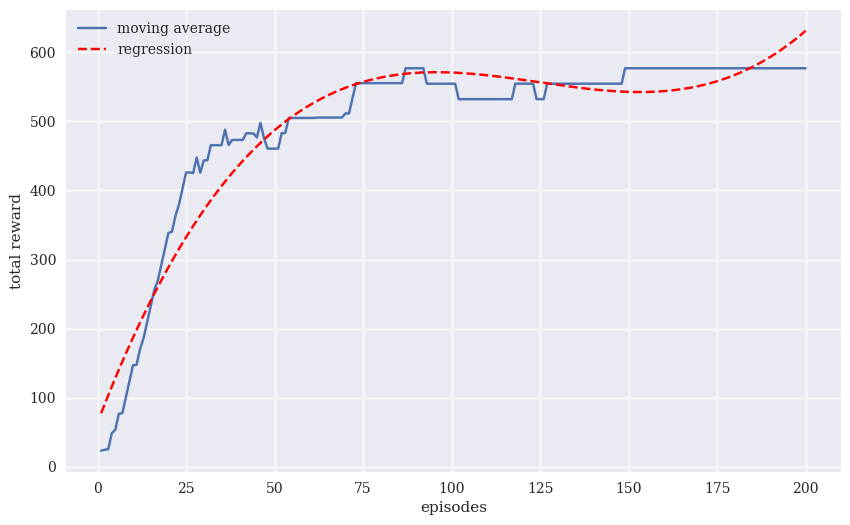

In [16]:
tradingbot.plot_treward(agent)

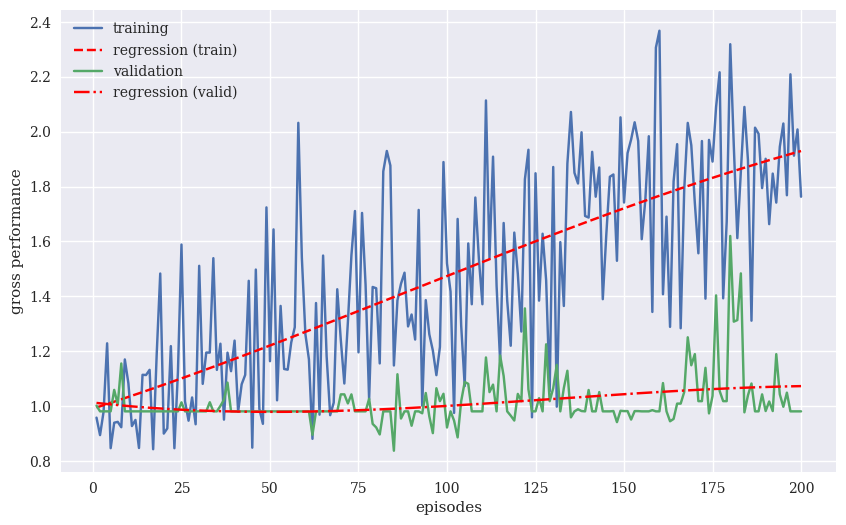

In [14]:
tradingbot.plot_performance(agent)

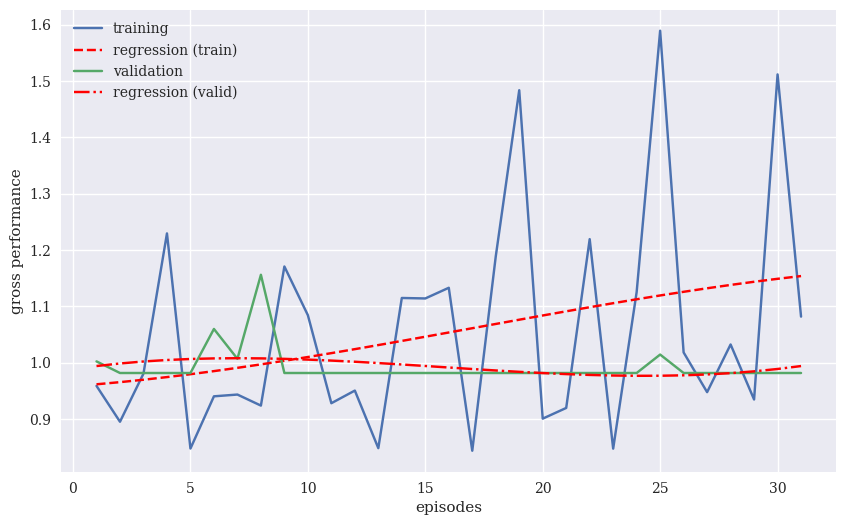

In [9]:
tradingbot.plot_performance(agent)

In [10]:
e=3
treward= 10
perf = 15
av = 10
max_treward = 20

In [11]:
templ = 'episode: {:2d}/{} | treward: {:4d} | ' 
templ += 'perf: {:5.3f} | av: {:5.1f} | max: {:4d}' 
print(templ.format(e, episodes, treward, perf,av,max_treward), end='\r')